# # Model: xgboost Classifier

### Author: Ehsan Gharib-Nezhad



In [1]:
from myfunctions import *

# # Import Bagging Classifier.
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [24]:
df = pd.read_csv('../datasets/text_processed_all_posts_combined_imbalanced.csv',index_col=0)
is_balanced = False # set True is the dataset is balanced!!! 

### Set up X and Y

In [25]:
X = df['token']
y = df['is_Covid19positive']

In [26]:
#check baseline:

y.value_counts(normalize = True)

1    0.929286
0    0.070714
Name: is_Covid19positive, dtype: float64

# train test split

In [27]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [28]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.929273
 0    0.070727
 Name: is_Covid19positive, dtype: float64,
 1    0.929322
 0    0.070678
 Name: is_Covid19positive, dtype: float64)

## CountVectorizer

The easiest way for us to convert text data into a structured, numeric `X` dataframe is to use `CountVectorizer`.

- **Count**: Count up how many times a token is observed in a given document.
- **Vectorizer**: Create a column (also known as a vector) that stores those counts.

![](./images/countvectorizer2.png)

In [29]:
cvec = CountVectorizer()

In [30]:
Xcv_train = cvec.fit_transform(X_train)
Xcv_test = cvec.transform(X_test)

# ======================================================
## For imbalanced case

In [31]:
ros = RandomOverSampler()

Xcv_train , y_train = ros.fit_resample(Xcv_train, y_train)

## XGbooster

In [32]:
xgb = XGBClassifier()

In [33]:
xgb.fit(Xcv_train, y_train)

[01:20:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Score on training set: 0.9827063106796117
Score on testing set: 0.956989247311828
              precision    recall  f1-score   support

           0       0.64      0.89      0.74       585
           1       0.99      0.96      0.98      7692

    accuracy                           0.96      8277
   macro avg       0.82      0.92      0.86      8277
weighted avg       0.97      0.96      0.96      8277



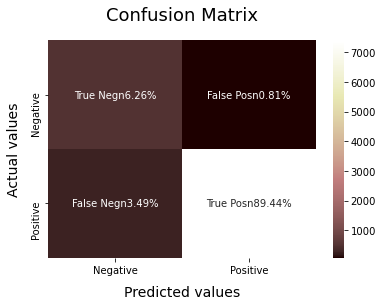

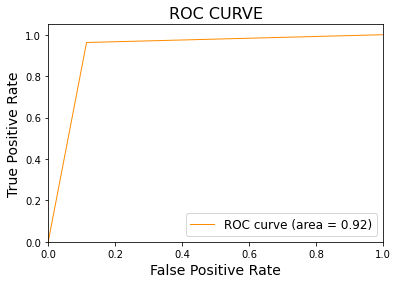

In [34]:
# Evaluate Model
model_Evaluate(xgb, Xcv_train, Xcv_test, y_train, y_test)

In [35]:
save_model_Evaluate_values(xgb, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='xgboost',
                             balanced = is_balanced)

(   score   metric    model balanced
 0   0.98  R_train  xgboost       no
 1   0.96   R_test  xgboost       no,
    is_pandemicPreps  is_covid19positive     metric    model balanced
 0              0.64                0.99  precision  xgboost       no
 1              0.89                0.96     recall  xgboost       no
 2              0.74                0.98     fscore  xgboost       no
 3            585.00             7692.00    support  xgboost       no,
    score     metric    model balanced
 0   0.06   True Neg  xgboost       no
 1   0.01  False Pos  xgboost       no
 2   0.03  False Neg  xgboost       no
 3   0.89   True Pos  xgboost       no)

# Feature Importance

In [36]:
#create a dataframe for our X_train_cv to use later:

df_X_train = pd.DataFrame(Xcv_train.todense(), columns=cvec.get_feature_names())

In [37]:
f = {'Feature Name':df_X_train.columns,'Feature Importance':xgb.feature_importances_}
fi = pd.DataFrame(f)

fi.sort_values(by=['Feature Importance'], ascending = False).head(20)

,Feature Name,Feature Importance
16838,symptom,0.066222
17199,test,0.040128
13187,posit,0.022278
13377,prep,0.015890
15741,smell,0.015527
6133,faulti,0.012052
12288,pain,0.010627
2170,breath,0.009845
6576,food,0.008849
17010,tast,0.008800


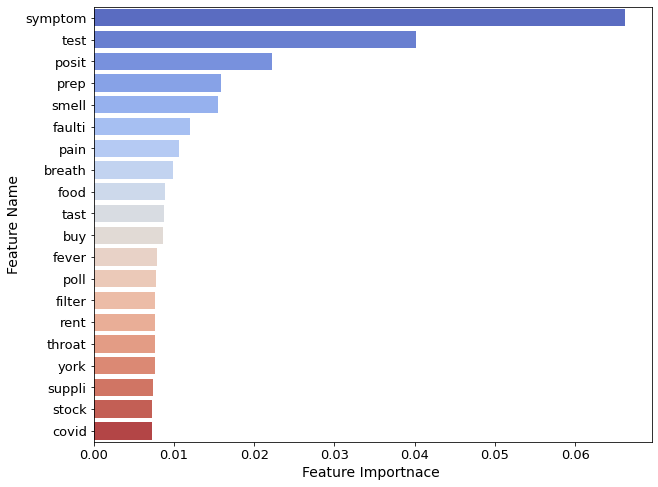

In [38]:
plt.figure( figsize=(10,8))
sns.barplot(x='Feature Importance',y='Feature Name', 
            data = fi.sort_values(by='Feature Importance', ascending=False).iloc[0:20],
            palette='coolwarm')
plt.xlabel('Feature Importnace ',fontsize=14)
plt.ylabel('Feature Name', fontsize = 14)
plt.tick_params('both', labelsize = 13)

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#  GridSearchCV
---

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
params = {
    'n_estimators'  : [50],
    'learning_rate' : [.2],
#     'booster' : ['gbtree', 'gblinear', 'dart']
}

In [40]:
xgb2 = XGBClassifier()

gs = GridSearchCV(xgb2, params, cv =3)

gs.fit(Xcv_train, y_train)


[01:20:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:20:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:20:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [41]:
gs.best_params_

{'learning_rate': 0.2, 'n_estimators': 50}

In [42]:
# Evaluate model.

print(f'Score on training set: {gs.score(Xcv_train, y_train)}')
print(f'Score on testing set: {gs.score(Xcv_test, y_test)}')
# we have overfitting because we need more Qs 

Score on training set: 0.9652392510402219
Score on testing set: 0.936812854899118


# Evaluate Model

Score on training set: 0.9652392510402219
Score on testing set: 0.936812854899118
              precision    recall  f1-score   support

           0       0.53      0.91      0.67       585
           1       0.99      0.94      0.97      7692

    accuracy                           0.94      8277
   macro avg       0.76      0.93      0.82      8277
weighted avg       0.96      0.94      0.94      8277



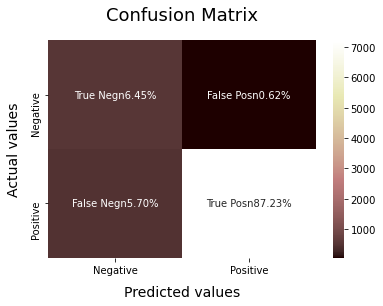

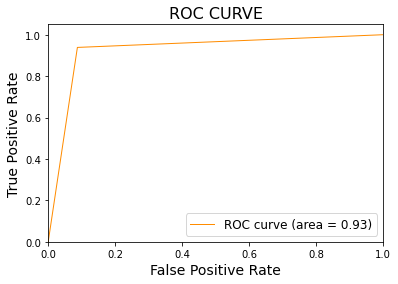

In [43]:
model_Evaluate(gs, Xcv_train, Xcv_test, y_train, y_test)

In [44]:
save_model_Evaluate_values(gs, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='xgboost-GridSearchCV',
                             balanced = is_balanced)

(   score   metric                 model balanced
 0   0.97  R_train  xgboost-GridSearchCV       no
 1   0.94   R_test  xgboost-GridSearchCV       no,
    is_pandemicPreps  is_covid19positive     metric                 model  \
 0              0.53                0.99  precision  xgboost-GridSearchCV   
 1              0.91                0.94     recall  xgboost-GridSearchCV   
 2              0.67                0.97     fscore  xgboost-GridSearchCV   
 3            585.00             7692.00    support  xgboost-GridSearchCV   
 
   balanced  
 0       no  
 1       no  
 2       no  
 3       no  ,
    score     metric                 model balanced
 0   0.06   True Neg  xgboost-GridSearchCV       no
 1   0.01  False Pos  xgboost-GridSearchCV       no
 2   0.06  False Neg  xgboost-GridSearchCV       no
 3   0.87   True Pos  xgboost-GridSearchCV       no)